In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load(file):
    df = pd.read_csv(file)
    load = [ row.loaded - row.start for index, row in df.iterrows() ]
    resolve = [ row.end - row.loaded for index, row in df.iterrows() ]
    df['load'] = load
    df['resolve'] = resolve
    df = df.drop(columns=['end','start','loaded','elements','file','language'])
    df = df.groupby(['lines']).mean()
    return df

def plot(data, language):
    ax = data.plot.bar(stacked=True, width=0.4, title=language)
    ax.set_ylabel("Time (ms)")
    ax.set_xlabel("File size (lines)")
    
def plotStack(df, language, ax):
    stack = df['load']+df['resolve']
    stack.plot(color='royalblue', ax=ax, marker='.', label="resolve")
    df['load'].plot(color='navy', ax=ax, figsize=(15,3), marker='.')
    ax.fill_between(df['load'].index, df['load'].values.T, color='steelblue')
    ax.fill_between(df['load'].index,  df['load'].values.T, stack.values.T, color='lightsteelblue')
    ax.set_ylabel("Time (ms)", fontsize=15)
    ax.set_xlabel("Lines of code", fontsize=15)
    ax.set_title(language, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    ax.legend()

Text(0, 0.5, '')

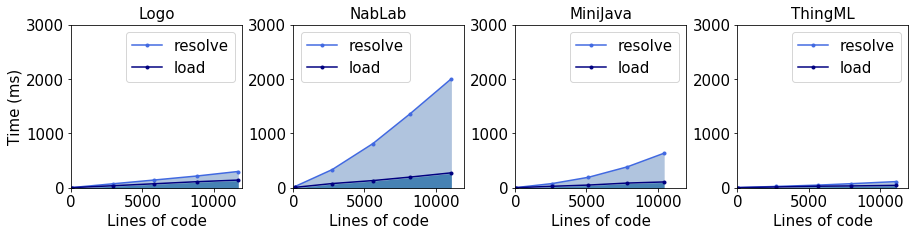

In [5]:
df1 = load('eval/logo-load-resolve.csv').loc[ [42,3242,6442,9802,13002] , : ]
df2 = load('eval/nablab-load-resolve.csv').loc[ [143,3223,6583,9663,13023] , : ]
df3 = load('eval/thingml-load-resolve.csv').loc[ [80,4304,8880,12576,17504] , : ]
df4 = load('eval/minijava-load-resolve.csv').loc[ [26,3226,6426,9826,13026] , : ]

# Use lines of code
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()
df1 = df1.drop(['lines'], axis=1)
df2 = df2.drop(['lines'], axis=1)
df3 = df3.drop(['lines'], axis=1)
df4 = df4.drop(['lines'], axis=1)
df1['lines'] = [37,2917,5797,8821,11701] # Count lines of code
df2['lines'] = [121,2739,5595,8213,11069]
df3['lines'] = [53,2741,5653,8005,11141]
df4['lines'] = [18,2578,5138,7858,10418]
df1 = df1.set_index('lines')
df2 = df2.set_index('lines')
df3 = df3.set_index('lines')
df4 = df4.set_index('lines')

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, gridspec_kw={'hspace': 0.9, 'wspace': 0.3})

plotStack(df1, 'Logo', ax1)
plotStack(df2, 'NabLab', ax2)
plotStack(df4, 'MiniJava', ax3)
plotStack(df3, 'ThingML', ax4)

ax1.set_ylim(0, 3000)
ax2.set_ylim(0, 3000)
ax3.set_ylim(0, 3000)
ax4.set_ylim(0, 3000)

ax1.set_xlim(0, 12000)
ax2.set_xlim(0, 12000)
ax3.set_xlim(0, 12000)
ax4.set_xlim(0, 12000)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)

ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
ax3.legend(fontsize=15)
ax4.legend(fontsize=15)

ax2.set_ylabel("", fontsize=15)
ax3.set_ylabel("", fontsize=15)
ax4.set_ylabel("", fontsize=15)